# Caclulating rolling returns over different horizons

In [1]:
library(tidyverse)
library(ggthemes)
library(odbc)
library(plutoR)
library(quantmod)
library(PerformanceAnalytics)

options("scipen"=999)
options(stringsAsFactors = FALSE)
options(repr.plot.width=16, repr.plot.height=8)

source("config.R")
source("goofy/plot.common.R")
source("goofy/misc.common.R")

indices <- Indices()

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.1
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Attaching package: ‘xts’

The following objects are masked from ‘package:dplyr’:

    first, last

Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.

Attaching package: ‘PerformanceAnalytics’

The following object is masked from ‘package:graphics’:

    legend

Registering fonts with R

Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine


Attaching package

In [2]:
numMonths <- 12 * 10 #10 years, a typical "long-term" buy and hold horizon
indexName <- "NIFTY 50 TR" #always use total return index where feasible

trIndex <- data.frame(indices$NseTimeSeries() %>%
    filter(NAME == indexName) %>%
    select(TIME_STAMP, CLOSE))

trXts <- xts(trIndex$CLOSE, as.Date(trIndex$TIME_STAMP))
monthlyTrReturns <- monthlyReturn(trXts)

#ignore the first and last months
monthlyTrReturns <- monthlyTrReturns[-1]
monthlyTrReturns <- monthlyTrReturns[-nrow(monthlyTrReturns)]

In [3]:
#caculate rolling returns
rollingRets <- rollapply(monthlyTrReturns, numMonths, Return.annualized)
rollingRets <- na.omit(rollingRets)*100

rollingRetDf <- data.frame(rollingRets)
names(rollingRetDf) <- c('R')
rollingRetDf$T <- index(rollingRets)

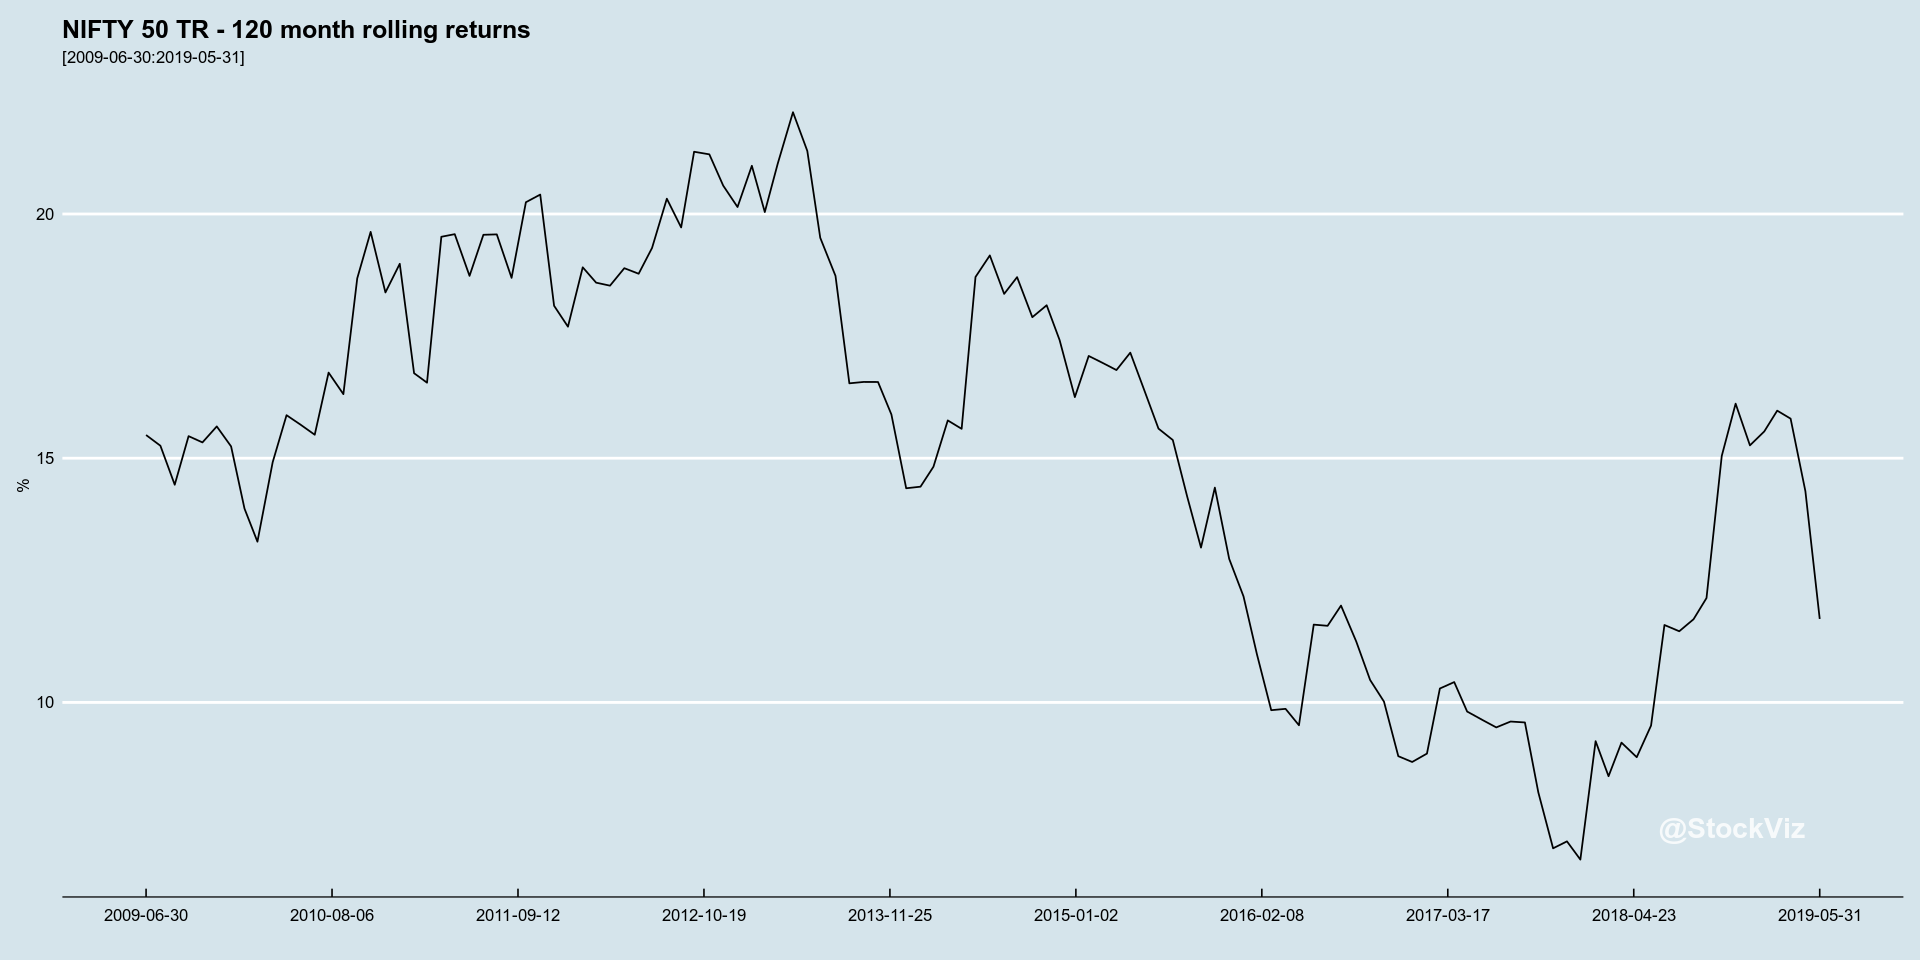

In [4]:
#plot rolling returns
firstDate <- first(index(rollingRets))
lastDate <- last(index(rollingRets))
xAxisTicks <- seq(from=firstDate, to=lastDate, length.out=10)

ggplot(rollingRetDf, aes(x=T, y=R)) +
    theme_economist() +
    geom_line() +
    scale_x_date(breaks = xAxisTicks) +
    labs(x='', y='%', color='', title=sprintf("%s - %d month rolling returns", indexName, numMonths), 
         subtitle=sprintf("[%s:%s]", firstDate, lastDate)) +
    annotate("text", x=lastDate, y=min(rollingRets), label = "@StockViz", hjust=1.1, vjust=-1.1, col="white", cex=6, fontface = "bold", alpha = 0.8)

In [5]:
print(summary(rollingRets))

     Index            monthly.returns 
 Min.   :2009-06-30   Min.   : 6.782  
 1st Qu.:2011-12-22   1st Qu.:11.676  
 Median :2014-06-14   Median :15.666  
 Mean   :2014-06-15   Mean   :15.178  
 3rd Qu.:2016-12-07   3rd Qu.:18.686  
 Max.   :2019-05-31   Max.   :22.084  


This notebook was created using [pluto](http://pluto.studio). Learn more [here](https://github.com/shyams80/pluto)